# Model Performance Transformations

Lets practice some basic data transformation for ML performance enhancement

In [114]:
# Imports

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [2]:
# Categorical data analyser

def cat_var(df, cols):
    '''
    Return: a Pandas dataframe object with the following columns:
        - "categorical_variable" => every categorical variable include as an input parameter (string).
        - "number_of_possible_values" => the amount of unique values that can take a given categorical variable (integer).
        - "values" => a list with the posible unique values for every categorical variable (list).

    Input parameters:
        - df -> Pandas dataframe object: a dataframe with categorical variables.
        - cols -> list object: a list with the name (string) of every categorical variable to analyse.
    '''
    cat_list = []
    for col in cols:
        cat = df[col].unique()
        cat_num = len(cat)
        cat_dict = {"categorical_variable":col,
                    "number_of_possible_values":cat_num,
                    "values":cat}
        cat_list.append(cat_dict)
    df = pd.DataFrame(cat_list).sort_values(by="number_of_possible_values", ascending=False)
    return df.reset_index(drop=True)

## Scaling

Some ML algorithms have problems performing well whenever the data scale differ greatly between features. In those cases scaling the data is your best option.

- [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

Try both options and see what happens with performance (i.e.: AUC).

<img src="../images/scaling.png" alt="Drawing" style="width: 500px;"/>

In [3]:
# Weather dataset (https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)

weather = pd.read_csv('../data/weatherAUS.csv')
print(weather.shape)
weather.head()

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Uluru weather (numerical features)

weather = weather[weather['Location'].isin(['Uluru'])].reset_index(drop=True)
weather = weather[weather['RainToday'].isin(['No','Yes'])].reset_index(drop=True)
weather = weather[weather['RainTomorrow'].isin(['No','Yes'])]
weather = weather[['MinTemp',
                   'MaxTemp',
                   'Rainfall',
                   'WindSpeed9am',
                   'WindSpeed3pm',
                   'Humidity9am',
                   'Humidity3pm',
                   'Pressure9am',
                   'Pressure3pm',
                   'Temp9am',
                   'Temp3pm',
                   'RainTomorrow']]
weather = weather.dropna().reset_index(drop=True)
col_weather = list(weather.columns)
print(col_weather)
print(weather.shape)
print(weather.describe())
weather.head()

['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']
(1479, 12)
           MinTemp      MaxTemp     Rainfall  WindSpeed9am  WindSpeed3pm  \
count  1479.000000  1479.000000  1479.000000   1479.000000   1479.000000   
mean     14.368627    30.402299     0.716700     17.613928     17.050710   
std       7.432857     7.624058     4.208585      7.887082      6.893016   
min      -1.900000    11.300000     0.000000      0.000000      0.000000   
25%       8.100000    23.800000     0.000000     11.000000     11.000000   
50%      14.900000    31.200000     0.000000     17.000000     17.000000   
75%      20.800000    37.100000     0.000000     24.000000     22.000000   
max      31.000000    44.400000    83.800000     41.000000     48.000000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm      Temp9am  \
count  1479.000000  1479.000000  1479.000000  1479.000000  1479.0

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,19.7,30.0,0.8,30.0,24.0,76.0,54.0,1010.6,1007.5,21.7,28.4,No
1,21.6,33.1,0.0,22.0,11.0,44.0,33.0,1010.5,1006.5,24.6,31.3,No
2,21.3,36.1,0.0,24.0,13.0,39.0,27.0,1006.9,1002.7,27.6,34.5,No
3,22.9,37.7,0.0,28.0,13.0,35.0,22.0,1006.0,1002.1,28.7,35.4,No
4,24.0,39.0,0.0,20.0,19.0,33.0,21.0,1006.9,1003.5,29.9,37.3,No


In [5]:
# Features + target

X = weather[['MinTemp',
          'MaxTemp',
          'Rainfall',
          'WindSpeed9am',
          'WindSpeed3pm',
          'Humidity9am',
          'Humidity3pm',
          'Pressure9am',
          'Pressure3pm',
          'Temp9am',
          'Temp3pm']]
y = pd.get_dummies(weather['RainTomorrow'], drop_first=True)['Yes']
print(X.shape,y.shape)

(1479, 11) (1479,)


In [6]:
# Train + test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")


X_train: (1183, 11), X_test: (296, 11), y_train: (1183,), y_test: (296,)
X_train: <class 'pandas.core.frame.DataFrame'>, X_test: <class 'pandas.core.frame.DataFrame'>, y_train: <class 'pandas.core.series.Series'>, y_test: <class 'pandas.core.series.Series'>


In [7]:
# Scaling

# Robust
scaler = RobustScaler()
X_train_rob = scaler.fit_transform(X_train)
X_test_rob = scaler.fit_transform(X_test)

# Min Max
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.fit_transform(X_test)

# Standard
scaler = StandardScaler()
X_train_sta = scaler.fit_transform(X_train)
X_test_sta = scaler.fit_transform(X_test)


In [8]:
# Linear model No scaling

linear_model = LogisticRegression(max_iter=1000)
linear_param = linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_auc = roc_auc_score(y_test, linear_pred)

print(f"No scaling. Linear model AUC is: {linear_auc}")


No scaling. Linear model AUC is: 0.7296218886566597


In [9]:
# Linear model Robust scaling

linear_model = LogisticRegression(max_iter=1000)
linear_param_rob = linear_model.fit(X_train_rob, y_train)
linear_pred_rob = linear_model.predict(X_test_rob)
linear_auc_rob = roc_auc_score(y_test, linear_pred_rob)

print(f"Robust. Linear model AUC is: {linear_auc_rob}")


Robust. Linear model AUC is: 0.6542846285388563


In [10]:
# Linear model MinMax scaling

linear_model = LogisticRegression(max_iter=1000)
linear_param_minmax = linear_model.fit(X_train_minmax, y_train)
linear_pred_minmax = linear_model.predict(X_test_minmax)
linear_auc_minmax = roc_auc_score(y_test, linear_pred_minmax)

print(f"MinMax. Linear model AUC is: {linear_auc_minmax}")


MinMax. Linear model AUC is: 0.6751852555576667


In [11]:
# Linear model Standard scaling

linear_model = LogisticRegression(max_iter=1000)
linear_param_sta = linear_model.fit(X_train_sta, y_train)
linear_pred_sta = linear_model.predict(X_test_sta)
linear_auc_sta = roc_auc_score(y_test, linear_pred_sta)

print(f"Standard. Linear model AUC is: {linear_auc_sta}")


Standard. Linear model AUC is: 0.6787953638609159


In [12]:
# Ensemble model No scaling

ensemble_model = RandomForestClassifier()
ensemble_param = ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_auc = roc_auc_score(y_test, ensemble_pred)

print(f"No scaling. Ensemble model AUC is: {ensemble_auc}")


No scaling. Linear model AUC is: 0.6679650389511685


In [13]:
# Ensemble model Robust scaling

ensemble_model = RandomForestClassifier()
ensemble_param_rob = ensemble_model.fit(X_train_rob, y_train)
ensemble_pred_rob = ensemble_model.predict(X_test_rob)
ensemble_auc_rob = roc_auc_score(y_test, ensemble_pred_rob)

print(f"Robust. Ensemble model AUC is: {ensemble_auc_rob}")


Robust. Linear model AUC is: 0.6225536766102983


In [14]:
# Ensemble model MinMax scaling

ensemble_model = RandomForestClassifier()
ensemble_param_minmax = ensemble_model.fit(X_train_minmax, y_train)
ensemble_pred_minmax = ensemble_model.predict(X_test_minmax)
ensemble_auc_minmax = roc_auc_score(y_test, ensemble_pred_minmax)

print(f"MinMax. Ensemble model AUC is: {ensemble_auc_minmax}")


MinMax. Linear model AUC is: 0.6888656659699791


In [15]:
# Ensemble model Standard scaling

ensemble_model = RandomForestClassifier()
ensemble_param_sta = ensemble_model.fit(X_train_sta, y_train)
ensemble_pred_sta = ensemble_model.predict(X_test_sta)
ensemble_auc_sta = roc_auc_score(y_test, ensemble_pred_sta)

print(f"Standard. Ensemble model AUC is: {ensemble_auc_sta}")


Standard. Linear model AUC is: 0.6924757742732283


---

## Enconding

ML algorithms do not support categorical data. Therefore you need to find a way to transform categorical data into numerical. You must compare the results using both techniques: __One Hot Encoding__ or __Label Encoding__

- [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

- [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)

<img src="../images/encoding.png" alt="Drawing" style="width: 500px;"/>

In [16]:
# Mushrooms dataset (https://www.kaggle.com/uciml/mushroom-classification)

mushrooms = pd.read_csv('../data/mushrooms.csv')
col_mushrooms = list(mushrooms.columns)
print(mushrooms.shape)
mushrooms.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [17]:
# Features analysis

cat_mushrooms = cat_var(mushrooms, col_mushrooms)
cat_mushrooms

,categorical_variable,number_of_possible_values,values
0,gill-color,12,"[k, n, g, p, w, h, u, e, b, r, y, o]"
1,cap-color,10,"[n, y, w, g, e, p, b, u, c, r]"
2,spore-print-color,9,"[k, n, u, h, w, r, o, y, b]"
3,odor,9,"[p, a, l, n, f, c, y, s, m]"
4,stalk-color-below-ring,9,"[w, p, g, b, n, e, y, o, c]"
5,stalk-color-above-ring,9,"[w, g, p, n, b, e, o, c, y]"
6,habitat,7,"[u, g, m, d, p, w, l]"
7,cap-shape,6,"[x, b, s, f, k, c]"
8,population,6,"[s, n, a, v, y, c]"
9,ring-type,5,"[p, e, l, f, n]"


In [18]:
cat_mushrooms['categorical_variable'].unique()

array(['gill-color', 'cap-color', 'spore-print-color', 'odor',
       'stalk-color-below-ring', 'stalk-color-above-ring', 'habitat',
       'cap-shape', 'population', 'ring-type', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'veil-color', 'cap-surface', 'ring-number', 'stalk-shape',
       'gill-size', 'gill-spacing', 'gill-attachment', 'bruises', 'class',
       'veil-type'], dtype=object)

In [ ]:
# Features + target (encoding). IMPORTANT: you may pick any of the 2-labeled features as you target (choose wisely!!!)

'''
veil-type -> one value -> Drop column
features with four distinct values or less -> one hot encoding (OneHotEncoder)
features with five distinct values or more -> label encoding / ordinal encoding (OrdinalEncoder)
'''


In [28]:
pd.set_option('display.max_columns', None)

In [29]:
one_enc=OneHotEncoder(drop='first')

In [30]:
one_mushrooms = pd.DataFrame(one_enc.fit_transform(mushrooms[['stalk-surface-above-ring',
                                                              'stalk-surface-below-ring',
                                                              'veil-color',
                                                              'cap-surface',
                                                              'ring-number',
                                                              'stalk-shape', 
                                                              'gill-size', 
                                                              'gill-spacing', 
                                                              'gill-attachment', 
                                                              'bruises',
                                                              'class',
                                                              'veil-type']]).toarray(), 
                             columns=['stalk-surface-above-ring_k',
                                      'stalk-surface-above-ring_s',
                                      'stalk-surface-above-ring_y',
                                      'stalk-surface-below-ring_k',
                                      'stalk-surface-below-ring_s',
                                      'stalk-surface-below-ring_y',
                                      'veil-color_o',
                                      'veil-color_w',
                                      'veil-color_y',
                                      'cap-surface_g',
                                      'cap-surface_s',
                                      'cap-surface_y',
                                      'ring-number_o',
                                      'ring-number_t',
                                      'stalk-shape_t',
                                      'gill-size_n', 
                                      'gill-spacing_w', 
                                      'gill-attachment_f', 
                                      'bruises_t',
                                      'class_p'])
one_mushrooms

,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,veil-color_o,veil-color_w,veil-color_y,cap-surface_g,cap-surface_s,cap-surface_y,ring-number_o,ring-number_t,stalk-shape_t,gill-size_n,gill-spacing_w,gill-attachment_f,bruises_t,class_p
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8120,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8121,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8122,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [31]:
ord_enc = OrdinalEncoder()

In [32]:
ord_mushrooms = pd.DataFrame(ord_enc.fit_transform(mushrooms[['gill-color', 
                                                              'cap-color', 
                                                              'spore-print-color', 
                                                              'odor',
                                                              'stalk-color-below-ring', 
                                                              'stalk-color-above-ring', 
                                                              'habitat',
                                                              'cap-shape', 
                                                              'population', 
                                                              'ring-type', 
                                                              'stalk-root']]), 
                             columns=['gill-color', 
                                      'cap-color', 
                                      'spore-print-color', 
                                      'odor',
                                      'stalk-color-below-ring', 
                                      'stalk-color-above-ring', 
                                      'habitat',
                                      'cap-shape', 
                                      'population', 
                                      'ring-type', 
                                      'stalk-root'])
ord_mushrooms


,gill-color,cap-color,spore-print-color,odor,stalk-color-below-ring,stalk-color-above-ring,habitat,cap-shape,population,ring-type,stalk-root
0,4.0,4.0,2.0,6.0,7.0,7.0,5.0,5.0,3.0,4.0,3.0
1,4.0,9.0,3.0,0.0,7.0,7.0,1.0,5.0,2.0,4.0,2.0
2,5.0,8.0,3.0,3.0,7.0,7.0,3.0,0.0,2.0,4.0,2.0
3,5.0,8.0,2.0,6.0,7.0,7.0,5.0,5.0,3.0,4.0,3.0
4,4.0,3.0,3.0,5.0,7.0,7.0,1.0,5.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
8119,11.0,4.0,0.0,5.0,5.0,5.0,2.0,3.0,1.0,4.0,0.0
8120,11.0,4.0,0.0,5.0,5.0,5.0,2.0,5.0,4.0,4.0,0.0
8121,5.0,4.0,0.0,5.0,5.0,5.0,2.0,2.0,1.0,4.0,0.0
8122,0.0,4.0,7.0,8.0,7.0,7.0,2.0,3.0,4.0,0.0,0.0


In [33]:
n_mushrooms = ord_mushrooms.merge(one_mushrooms,
                                  left_index=True,
                                  right_index=True)
n_mushrooms

,gill-color,cap-color,spore-print-color,odor,stalk-color-below-ring,stalk-color-above-ring,habitat,cap-shape,population,ring-type,stalk-root,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,veil-color_o,veil-color_w,veil-color_y,cap-surface_g,cap-surface_s,cap-surface_y,ring-number_o,ring-number_t,stalk-shape_t,gill-size_n,gill-spacing_w,gill-attachment_f,bruises_t,class_p
0,4.0,4.0,2.0,6.0,7.0,7.0,5.0,5.0,3.0,4.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,4.0,9.0,3.0,0.0,7.0,7.0,1.0,5.0,2.0,4.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,5.0,8.0,3.0,3.0,7.0,7.0,3.0,0.0,2.0,4.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,5.0,8.0,2.0,6.0,7.0,7.0,5.0,5.0,3.0,4.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,4.0,3.0,3.0,5.0,7.0,7.0,1.0,5.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,11.0,4.0,0.0,5.0,5.0,5.0,2.0,3.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8120,11.0,4.0,0.0,5.0,5.0,5.0,2.0,5.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8121,5.0,4.0,0.0,5.0,5.0,5.0,2.0,2.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8122,0.0,4.0,7.0,8.0,7.0,7.0,2.0,3.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [34]:
n_mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gill-color                  8124 non-null   float64
 1   cap-color                   8124 non-null   float64
 2   spore-print-color           8124 non-null   float64
 3   odor                        8124 non-null   float64
 4   stalk-color-below-ring      8124 non-null   float64
 5   stalk-color-above-ring      8124 non-null   float64
 6   habitat                     8124 non-null   float64
 7   cap-shape                   8124 non-null   float64
 8   population                  8124 non-null   float64
 9   ring-type                   8124 non-null   float64
 10  stalk-root                  8124 non-null   float64
 11  stalk-surface-above-ring_k  8124 non-null   float64
 12  stalk-surface-above-ring_s  8124 non-null   float64
 13  stalk-surface-above-ring_y  8124 

In [35]:
n_mushrooms.columns

Index(['gill-color', 'cap-color', 'spore-print-color', 'odor',
       'stalk-color-below-ring', 'stalk-color-above-ring', 'habitat',
       'cap-shape', 'population', 'ring-type', 'stalk-root',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'stalk-surface-below-ring_k',
       'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y',
       'veil-color_o', 'veil-color_w', 'veil-color_y', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'ring-number_o', 'ring-number_t',
       'stalk-shape_t', 'gill-size_n', 'gill-spacing_w', 'gill-attachment_f',
       'bruises_t', 'class_p'],
      dtype='object')

In [36]:
# Features

X = n_mushrooms[['gill-color', 'cap-color', 'spore-print-color', 'odor',
       'stalk-color-below-ring', 'stalk-color-above-ring', 'habitat',
       'cap-shape', 'population', 'ring-type', 'stalk-root',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'stalk-surface-below-ring_k',
       'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y',
       'veil-color_o', 'veil-color_w', 'veil-color_y', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'ring-number_o', 'ring-number_t',
       'stalk-shape_t', 'gill-size_n', 'gill-spacing_w', 'gill-attachment_f',
       'bruises_t']]
print(X.shape)
X

(8124, 30)


,gill-color,cap-color,spore-print-color,odor,stalk-color-below-ring,stalk-color-above-ring,habitat,cap-shape,population,ring-type,stalk-root,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,veil-color_o,veil-color_w,veil-color_y,cap-surface_g,cap-surface_s,cap-surface_y,ring-number_o,ring-number_t,stalk-shape_t,gill-size_n,gill-spacing_w,gill-attachment_f,bruises_t
0,4.0,4.0,2.0,6.0,7.0,7.0,5.0,5.0,3.0,4.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1,4.0,9.0,3.0,0.0,7.0,7.0,1.0,5.0,2.0,4.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,5.0,8.0,3.0,3.0,7.0,7.0,3.0,0.0,2.0,4.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,5.0,8.0,2.0,6.0,7.0,7.0,5.0,5.0,3.0,4.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,4.0,3.0,3.0,5.0,7.0,7.0,1.0,5.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,11.0,4.0,0.0,5.0,5.0,5.0,2.0,3.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8120,11.0,4.0,0.0,5.0,5.0,5.0,2.0,5.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8121,5.0,4.0,0.0,5.0,5.0,5.0,2.0,2.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8122,0.0,4.0,7.0,8.0,7.0,7.0,2.0,3.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [37]:
# Target

y = n_mushrooms['class_p']
print(y.shape)
y

(8124,)


0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
8119    0.0
8120    0.0
8121    0.0
8122    1.0
8123    0.0
Name: class_p, Length: 8124, dtype: float64

In [38]:
# Train + test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")


X_train: (6499, 30), X_test: (1625, 30), y_train: (6499,), y_test: (1625,)
X_train: <class 'pandas.core.frame.DataFrame'>, X_test: <class 'pandas.core.frame.DataFrame'>, y_train: <class 'pandas.core.series.Series'>, y_test: <class 'pandas.core.series.Series'>


In [39]:
# Scaling

# Robust
scaler = RobustScaler()
X_train_rob = scaler.fit_transform(X_train)
X_test_rob = scaler.fit_transform(X_test)

# Min Max
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.fit_transform(X_test)

# Standard
scaler = StandardScaler()
X_train_sta = scaler.fit_transform(X_train)
X_test_sta = scaler.fit_transform(X_test)


In [40]:
# Linear model

linear_model = LogisticRegression(max_iter=1000)
linear_param = linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_auc = roc_auc_score(y_test, linear_pred)
print(f"Linear model AUC is: {linear_auc}")

Linear model AUC is: 0.9516167444851992


In [41]:
# Linear model Robust scaling

linear_model = LogisticRegression(max_iter=1000)
linear_param_rob = linear_model.fit(X_train_rob, y_train)
linear_pred_rob = linear_model.predict(X_test_rob)
linear_auc_rob = roc_auc_score(y_test, linear_pred_rob)

print(f"Robust. Linear model AUC is: {linear_auc_rob}")


Robust. Linear model AUC is: 0.9568160236398443


In [42]:
# Linear model MinMax scaling

linear_model = LogisticRegression(max_iter=1000)
linear_param_minmax = linear_model.fit(X_train_minmax, y_train)
linear_pred_minmax = linear_model.predict(X_test_minmax)
linear_auc_minmax = roc_auc_score(y_test, linear_pred_minmax)

print(f"MinMax. Linear model AUC is: {linear_auc_minmax}")


MinMax. Linear model AUC is: 0.9485586126760777


In [43]:
# Linear model Standard scaling

linear_model = LogisticRegression(max_iter=1000)
linear_param_sta = linear_model.fit(X_train_sta, y_train)
linear_pred_sta = linear_model.predict(X_test_sta)
linear_auc_sta = roc_auc_score(y_test, linear_pred_sta)

print(f"Standard. Linear model AUC is: {linear_auc_sta}")


Standard. Linear model AUC is: 0.9567781003783224


In [44]:
# Ensemble model

ensemble_model = RandomForestClassifier()
ensemble_param = ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_auc = roc_auc_score(y_test, ensemble_pred)
print(f"Linear model AUC is: {ensemble_auc}")

Linear model AUC is: 1.0


In [45]:
# Ensemble model Robust scaling

ensemble_model = RandomForestClassifier()
ensemble_param_rob = ensemble_model.fit(X_train_rob, y_train)
ensemble_pred_rob = ensemble_model.predict(X_test_rob)
ensemble_auc_rob = roc_auc_score(y_test, ensemble_pred_rob)

print(f"Robust. Linear model AUC is: {ensemble_auc_rob}")


Robust. Linear model AUC is: 1.0


In [46]:
# Ensemble model MinMax scaling

ensemble_model = RandomForestClassifier()
ensemble_param_minmax = ensemble_model.fit(X_train_minmax, y_train)
ensemble_pred_minmax = ensemble_model.predict(X_test_minmax)
ensemble_auc_minmax = roc_auc_score(y_test, ensemble_pred_minmax)

print(f"MinMax. Linear model AUC is: {ensemble_auc_minmax}")


MinMax. Linear model AUC is: 1.0


In [47]:
# Ensemble model Standard scaling

ensemble_model = RandomForestClassifier()
ensemble_param_sta = ensemble_model.fit(X_train_sta, y_train)
ensemble_pred_sta = ensemble_model.predict(X_test_sta)
ensemble_auc_sta = roc_auc_score(y_test, ensemble_pred_sta)

print(f"Standard. Linear model AUC is: {ensemble_auc_sta}")


Standard. Linear model AUC is: 1.0


---

## Bonus

Now that you can grasp the potential of pre-processing your data...what would you do about the following dataset?

<img src="../images/bonus.jpg" alt="Drawing" style="width: 500px;"/>

In [491]:
# Netflix dataset (https://www.kaggle.com/shivamb/netflix-shows)

netflix = pd.read_csv('../data/netflix_titles.csv')
print(netflix.shape)
netflix.head()

(7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [492]:
# ML workflow -> ¿what would you do?



In [493]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [494]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [495]:
print(f'   director:   {2389/len(netflix)* 100},\n \
  cast:       {718 /len(netflix)* 100},\n \
  country:    {507 /len(netflix)* 100},\n \
  date_added: {10  /len(netflix)* 100},\n \
  rating:     {7   /len(netflix)* 100}')

   director:   30.679337357133683,
   cast:       9.220495697958135,
   country:    6.51085141903172,
   date_added: 0.1284191601386927,
   rating:     0.08989341209708489


In [496]:
col_netflix = list(netflix.columns)
cat_netflix = cat_var(netflix, col_netflix)
cat_netflix

,categorical_variable,number_of_possible_values,values
0,show_id,7787,"[s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,..."
1,title,7787,"[3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19..."
2,description,7769,[In a future where the elite inhabit an island...
3,cast,6832,"[João Miguel, Bianca Comparato, Michel Gomes, ..."
4,director,4050,"[nan, Jorge Michel Grau, Gilbert Chan, Shane A..."
5,date_added,1566,"[August 14, 2020, December 23, 2016, December ..."
6,country,682,"[Brazil, Mexico, Singapore, United States, Tur..."
7,listed_in,492,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
8,duration,216,"[4 Seasons, 93 min, 78 min, 80 min, 123 min, 1..."
9,release_year,73,"[2020, 2016, 2011, 2009, 2008, 2019, 1997, 201..."


In [497]:
'''
show_id, title, description, cast, director -> a lot of different values and some columns with nulls. Drop columns
'''

'\nshow_id, title, description, cast, director -> a lot of different values and some columns with nulls. Drop columns\n'

In [498]:
'''
We can make a list of countries to reduce number of elements for column country and assing Other value to null.
But they are a lot of values and I don't know what can I do and if it's significant information.
Drop column country.
'''

netflix['country'] = netflix['country'].fillna('Other')

list_country = list(netflix['country'].unique())
list_country = [i.split(',') for i in list_country]
list_country = list(set([country.strip() for countries in list_country for country in countries]))
list_country.remove('')

print(len(list_country))
list_country

118


['Slovenia',
 'New Zealand',
 'Argentina',
 'Sri Lanka',
 'Panama',
 'South Korea',
 'Brazil',
 'Sweden',
 'Saudi Arabia',
 'Mauritius',
 'West Germany',
 'Vietnam',
 'Netherlands',
 'Bahamas',
 'Belarus',
 'Cuba',
 'Paraguay',
 'Bulgaria',
 'Morocco',
 'Senegal',
 'Iran',
 'East Germany',
 'Chile',
 'Nicaragua',
 'Luxembourg',
 'Lithuania',
 'Romania',
 'Soviet Union',
 'Mexico',
 'Montenegro',
 'Afghanistan',
 'Poland',
 'Canada',
 'Armenia',
 'Kuwait',
 'Switzerland',
 'Dominican Republic',
 'Albania',
 'Belgium',
 'Greece',
 'Russia',
 'Ecuador',
 'Egypt',
 'Germany',
 'Cayman Islands',
 'Indonesia',
 'United States',
 'Spain',
 'Malta',
 'Other',
 'Colombia',
 'Guatemala',
 'Peru',
 'Serbia',
 'Nepal',
 'France',
 'Hungary',
 'Ghana',
 'Czech Republic',
 'Vatican City',
 'Slovakia',
 'Jamaica',
 'Turkey',
 'Nigeria',
 'Ireland',
 'Iraq',
 'Cyprus',
 'Algeria',
 'Azerbaijan',
 'Iceland',
 'Malaysia',
 'Syria',
 'Georgia',
 'Uruguay',
 'Finland',
 'Mongolia',
 'Kazakhstan',
 'Zimbab

In [499]:
n_netflix = netflix[['date_added', 'listed_in', 'duration', 'release_year', 'rating', 'type']].copy()
n_netflix

,date_added,listed_in,duration,release_year,rating,type
0,"August 14, 2020","International TV Shows, TV Dramas, TV Sci-Fi &...",4 Seasons,2020,TV-MA,TV Show
1,"December 23, 2016","Dramas, International Movies",93 min,2016,TV-MA,Movie
2,"December 20, 2018","Horror Movies, International Movies",78 min,2011,R,Movie
3,"November 16, 2017","Action & Adventure, Independent Movies, Sci-Fi...",80 min,2009,PG-13,Movie
4,"January 1, 2020",Dramas,123 min,2008,PG-13,Movie
...,...,...,...,...,...,...
7782,"October 19, 2020","Dramas, International Movies",99 min,2005,TV-MA,Movie
7783,"March 2, 2019","Dramas, International Movies, Music & Musicals",111 min,2015,TV-14,Movie
7784,"September 25, 2020","Documentaries, International Movies, Music & M...",44 min,2019,TV-MA,Movie
7785,"October 31, 2020","International TV Shows, Reality TV",1 Season,2019,TV-PG,TV Show


In [500]:
n_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date_added    7777 non-null   object
 1   listed_in     7787 non-null   object
 2   duration      7787 non-null   object
 3   release_year  7787 non-null   int64 
 4   rating        7780 non-null   object
 5   type          7787 non-null   object
dtypes: int64(1), object(5)
memory usage: 365.1+ KB


In [501]:
n_netflix.isnull().sum()

date_added      10
listed_in        0
duration         0
release_year     0
rating           7
type             0
dtype: int64

In [502]:
print(f'   date_added: {10  /len(netflix)* 100},\n \
  rating:     {7   /len(netflix)* 100}')

   date_added: 0.1284191601386927,
   rating:     0.08989341209708489


In [503]:
n_netflix.dropna(inplace=True)

In [504]:
n_netflix.isnull().sum()

date_added      0
listed_in       0
duration        0
release_year    0
rating          0
type            0
dtype: int64

In [505]:
n_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date_added    7770 non-null   object
 1   listed_in     7770 non-null   object
 2   duration      7770 non-null   object
 3   release_year  7770 non-null   int64 
 4   rating        7770 non-null   object
 5   type          7770 non-null   object
dtypes: int64(1), object(5)
memory usage: 424.9+ KB


In [506]:
col_netflix = list(n_netflix.columns)
cat_netflix = cat_var(n_netflix, col_netflix)
cat_netflix

,categorical_variable,number_of_possible_values,values
0,date_added,1563,"[August 14, 2020, December 23, 2016, December ..."
1,listed_in,491,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
2,duration,216,"[4 Seasons, 93 min, 78 min, 80 min, 123 min, 1..."
3,release_year,73,"[2020, 2016, 2011, 2009, 2008, 2019, 1997, 201..."
4,rating,14,"[TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y..."
5,type,2,"[TV Show, Movie]"


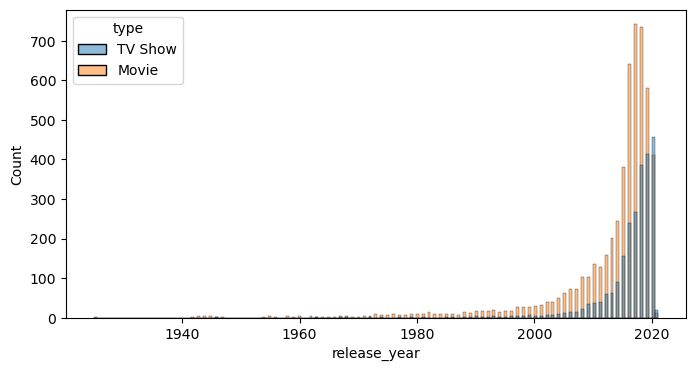

In [507]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.histplot(data=n_netflix,
             x='release_year',
             hue='type')

plt.show()

In [508]:
# groups for release_year
# 2000 -> until 2000
# 2010 -> until 2010
# 2020 -> over 2010
def groups_release_year(year):
    if year <= 2000:
        return 2000
    elif year <= 2010:
        return 2010
    else:
        return 2020

In [509]:
n_netflix['group_year'] = n_netflix['release_year'].apply(groups_release_year)
n_netflix.head(2)

,date_added,listed_in,duration,release_year,rating,type,group_year
0,"August 14, 2020","International TV Shows, TV Dramas, TV Sci-Fi &...",4 Seasons,2020,TV-MA,TV Show,2020
1,"December 23, 2016","Dramas, International Movies",93 min,2016,TV-MA,Movie,2020


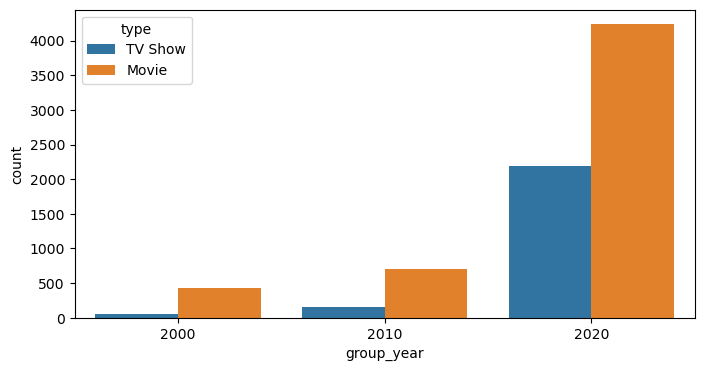

In [510]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.countplot(data=n_netflix,
              x='group_year',
              hue='type')

plt.show()

In [511]:
n_netflix['year_added'] = pd.to_datetime(n_netflix['date_added']).dt.year
n_netflix.head(2)

,date_added,listed_in,duration,release_year,rating,type,group_year,year_added
0,"August 14, 2020","International TV Shows, TV Dramas, TV Sci-Fi &...",4 Seasons,2020,TV-MA,TV Show,2020,2020
1,"December 23, 2016","Dramas, International Movies",93 min,2016,TV-MA,Movie,2020,2016


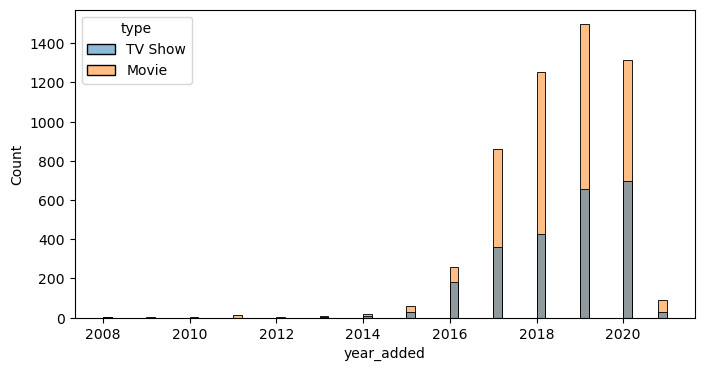

In [512]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.histplot(data=n_netflix,
             x='year_added',
             hue='type')

plt.show()

In [513]:
# groups for year_added
# 2016 -> until 2016
# 2018 -> until 2018
# 2020 -> until 2020
# 2022 -> until 2022
def groups_year_added(year):
    if year <= 2016:
        return 2016
    elif year <= 2018:
        return 2018
    elif year <= 2020:
        return 2020
    else:
        return 2022

In [514]:
n_netflix['group_added'] = n_netflix['year_added'].apply(groups_year_added)
n_netflix.head(2)

,date_added,listed_in,duration,release_year,rating,type,group_year,year_added,group_added
0,"August 14, 2020","International TV Shows, TV Dramas, TV Sci-Fi &...",4 Seasons,2020,TV-MA,TV Show,2020,2020,2020
1,"December 23, 2016","Dramas, International Movies",93 min,2016,TV-MA,Movie,2020,2016,2016


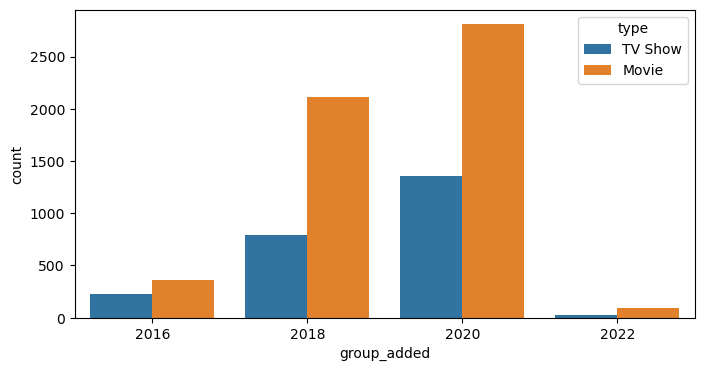

In [515]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.countplot(data=n_netflix,
              x='group_added',
              hue='type')

plt.show()

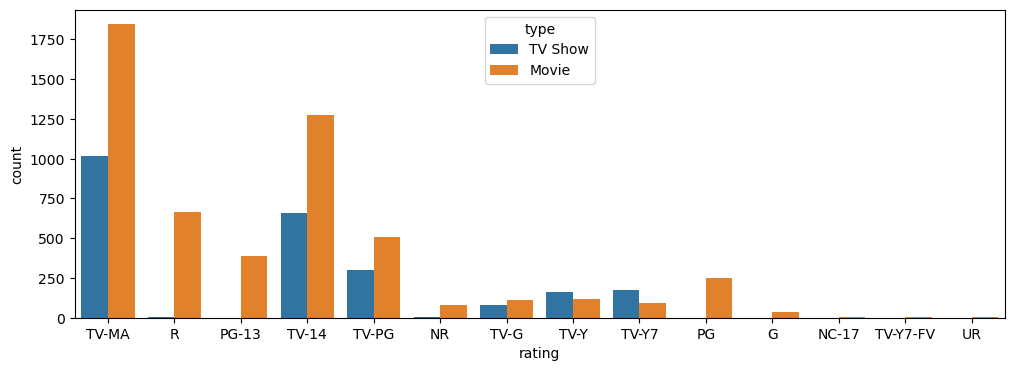

In [516]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.countplot(data=n_netflix,
              x='rating',
              hue='type')

plt.show()

In [517]:
# one hot encoding
n_netflix.drop(['release_year', 'year_added', 'date_added'], axis=1, inplace=True)

n_netflix = pd.get_dummies(n_netflix, columns=['type', 'group_year', 'group_added', 'rating'], drop_first=True)

n_netflix['duration'] = ((n_netflix['duration'].str.contains('Seasons') | \
                          n_netflix['duration'].str.contains('Season'))).astype(int)

n_netflix.head(2)

,listed_in,duration,type_TV Show,group_year_2010,group_year_2020,group_added_2018,group_added_2020,group_added_2022,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,"Dramas, International Movies",0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [518]:
'''
Column listed_in a lot of values. 
We can one hot encoding for every value, but I think is better two categories: tv or not tv genre.
'''

'\nColumn listed_in a lot of values. \nWe can one hot encoding for every value, but I think is better two categories: tv or not tv genre.\n'

In [519]:
###list_listed_in = list(netflix['listed_in'].unique())
###list_listed_in = [i.split(',') for i in list_listed_in]
###list_listed_in = list(set([element.strip() for elements in list_listed_in for element in elements]))
###
###print(len(list_listed_in))
###list_listed_in

In [520]:
###for genre in list_listed_in:
###    n_netflix[genre] = 0
###    
###n_netflix.head(3)

In [521]:
###def set_genre_listed_in(genre, row):
###    list_genre = genre.split(',')
###    list_columns =  []
###    for i in list_genre:
###        column = i.strip()
###        n_netflix.at[row.name, column] = 1
###        list_columns.append(column)
###    return list_columns

In [522]:
###n_netflix['test'] = n_netflix.apply(lambda x: set_genre_listed_in(x['listed_in'], x), axis=1)
###n_netflix

In [523]:
n_netflix['genre_TV'] = 0
n_netflix['genre_TV'] = (n_netflix['listed_in'].str.contains('TV').astype(int) | \
                         n_netflix['listed_in'].str.lower().str.contains('series').astype(int) | \
                         n_netflix['listed_in'].str.lower().str.contains('shows').astype(int))
n_netflix.head(2)

,listed_in,duration,type_TV Show,group_year_2010,group_year_2020,group_added_2018,group_added_2020,group_added_2022,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,genre_TV
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,"Dramas, International Movies",0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,"Horror Movies, International Movies",0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,"Action & Adventure, Independent Movies, Sci-Fi...",0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Dramas,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,"Dramas, International Movies",0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7783,"Dramas, International Movies, Music & Musicals",0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7784,"Documentaries, International Movies, Music & M...",0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7785,"International TV Shows, Reality TV",1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [524]:
print(n_netflix['genre_TV'].value_counts())
print(n_netflix['type_TV Show'].value_counts())

0    5372
1    2398
Name: genre_TV, dtype: int64
0    5372
1    2398
Name: type_TV Show, dtype: int64


In [525]:
n_netflix.loc[(n_netflix['type_TV Show'] == 0) & \
              (n_netflix['genre_TV'] == 1)]

,listed_in,duration,type_TV Show,group_year_2010,group_year_2020,group_added_2018,group_added_2020,group_added_2022,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,genre_TV


In [526]:
n_netflix.loc[(n_netflix['type_TV Show'] == 1) & \
              (n_netflix['genre_TV'] == 0)]

,listed_in,duration,type_TV Show,group_year_2010,group_year_2020,group_added_2018,group_added_2020,group_added_2022,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,genre_TV


In [527]:
n_netflix.drop(['listed_in'], axis=1, inplace=True)


In [528]:
n_netflix

,duration,type_TV Show,group_year_2010,group_year_2020,group_added_2018,group_added_2020,group_added_2022,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,genre_TV
0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7783,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7784,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7785,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [529]:
n_netflix.columns

Index(['duration', 'type_TV Show', 'group_year_2010', 'group_year_2020',
       'group_added_2018', 'group_added_2020', 'group_added_2022',
       'rating_NC-17', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R',
       'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG',
       'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR',
       'genre_TV'],
      dtype='object')

In [531]:
# Features + target

X = n_netflix[['duration', 'group_year_2010', 'group_year_2020',
       'group_added_2018', 'group_added_2020', 'group_added_2022',
       'rating_NC-17', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R',
       'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG',
       'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR',
       'genre_TV']]
y = n_netflix['type_TV Show']
print(X.shape,y.shape)

(7770, 20) (7770,)


In [532]:
# Train + test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")


X_train: (6216, 20), X_test: (1554, 20), y_train: (6216,), y_test: (1554,)
X_train: <class 'pandas.core.frame.DataFrame'>, X_test: <class 'pandas.core.frame.DataFrame'>, y_train: <class 'pandas.core.series.Series'>, y_test: <class 'pandas.core.series.Series'>


In [533]:
# Linear model No scaling

linear_model = LogisticRegression(max_iter=1000)
linear_param = linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_auc = roc_auc_score(y_test, linear_pred)

print(f"No scaling. Linear model AUC is: {linear_auc}")


No scaling. Linear model AUC is: 1.0


In [534]:
# Ensemble model No scaling

ensemble_model = RandomForestClassifier()
ensemble_param = ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_auc = roc_auc_score(y_test, ensemble_pred)

print(f"No scaling. Ensemble model AUC is: {ensemble_auc}")


No scaling. Linear model AUC is: 1.0


In [ ]:
'''
AUC is perfect :-O
something is wrong... :_(
'''

---